In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import genextreme as gev

from unseen import fileio
from unseen import indices

In [20]:
ds_obs = fileio.open_dataset('/g/data/xv83/dbi599/seatac/data/tasmax_GHCNv2_1948-2021_A-DEC-max_seatac.zarr.zip')

In [21]:
all_obs_shape, all_obs_loc, all_obs_scale = indices.fit_gev(ds_obs['tasmax'].values)
print(f'All observations GEV fit: shape={all_obs_shape}, location={all_obs_loc}, scale={all_obs_scale}')

All observations GEV fit: shape=0.2167602048427223, location=33.06271388394495, scale=2.5055712691255674


No handles with labels found to put in legend.


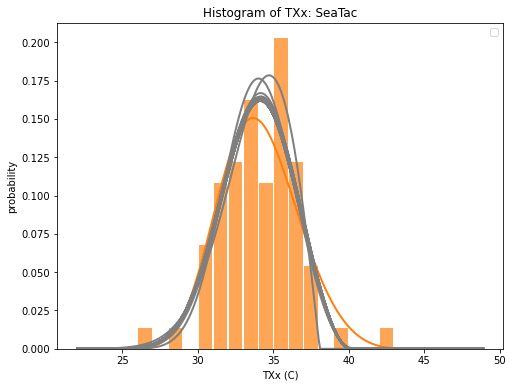

In [24]:
fig = plt.figure(figsize=[8, 6])
ax1 = fig.add_subplot(111)

bins = np.arange(23, 49)
gev_xvals = np.arange(22, 49, 0.1)
    
ds_obs['tasmax'].plot.hist(
    ax=ax1,
    bins=bins,
    density=True,
    rwidth=0.9,
    alpha=0.7,
    color='tab:orange',
)
all_obs_pdf = gev.pdf(gev_xvals, all_obs_shape, all_obs_loc, all_obs_scale)
ax1.plot(gev_xvals, all_obs_pdf, color='tab:orange', linewidth=2.0)

no_max_values = ds_obs['tasmax'].values[:-1]
for year in range(len(no_max_values)):
    values = np.delete(no_max_values, year)
    obs_shape, obs_loc, obs_scale = indices.fit_gev(values)
    obs_pdf = gev.pdf(gev_xvals, obs_shape, obs_loc, obs_scale)
    ax1.plot(gev_xvals, obs_pdf, color='tab:gray', linewidth=2.0)

ax1.legend()
ax1.set_xlabel('TXx (C)')
ax1.set_ylabel('probability')
ax1.set_title('Histogram of TXx: SeaTac')
plt.show()